# Example of random sequence generation
This notebook is to experiment with random sequence generation

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)



#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '8b1969b503c94272f7eccbd537d469922725b10e'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [6]:
from connectivity_functions import  calculate_random_sequence, calculate_overlap_matrix
from connectivity_functions import calculate_overlap_one_to_all, calculate_overlap_one_to_one
from plotting_functions import plot_artificial_sequences

## The example

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

value = 1.0
inhibition = -1
decay_factor = 1.0
sequence_decay = 1.0
extension = 2

sequence_length = 5
overload = 2
overlap = 4
one_to_one = True


# Desired patterns
total_sequences = 20

# Running parameters
max_iter = 1e4

# Random seed
prng = np.random.RandomState(seed=2)

In [7]:
aux = calculate_random_sequence(minicolumns, sequence_length, overlap,  overload,  one_to_one=one_to_one,
                                prng=prng, total_sequences=total_sequences, max_iter=max_iter)
sequences, overlap_dictionary, overload_matrix = aux

# Calculate characteirstics
if one_to_one:
    total_overlap = calculate_overlap_one_to_one(sequences)
else:
    total_overlap = calculate_overlap_one_to_all(overlap_dictionary)

overlap_matrix = calculate_overlap_matrix(sequences)

overload matrix
[ 2.  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.
  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  0.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
overlap matrix
[[ 0.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 2.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.]
 [ 1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
   0.]
 [ 1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.
   0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.
   0.]
 [ 0.  1.  2.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.
   0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.
   0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0

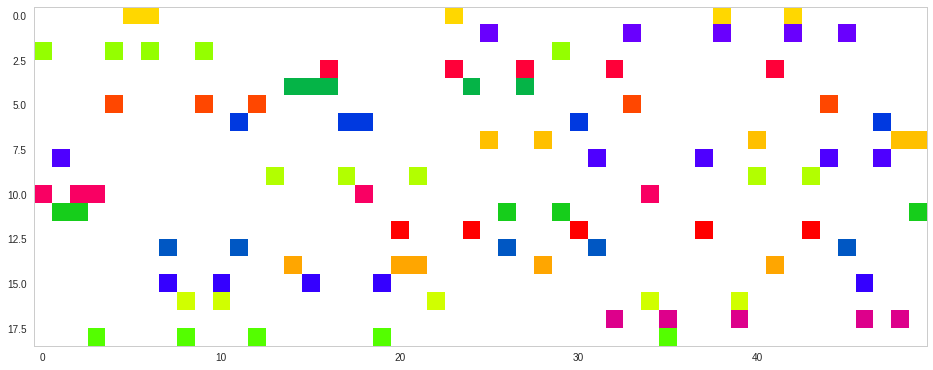

In [8]:
print('overload matrix')
print(overload_matrix)
print('overlap matrix')
print(overlap_matrix)
print('total overlap')
print(total_overlap)

plot_artificial_sequences(sequences, minicolumns)